In [1]:
import iris
import iris.coord_categorisation
import matplotlib.pyplot as plt
import glob
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
infiles = glob.glob('/g/data/r87/dbi599/CMIP6/CMIP/*/*/historical/*/Ayr/pr/*/*/pr-global-sum*.nc')

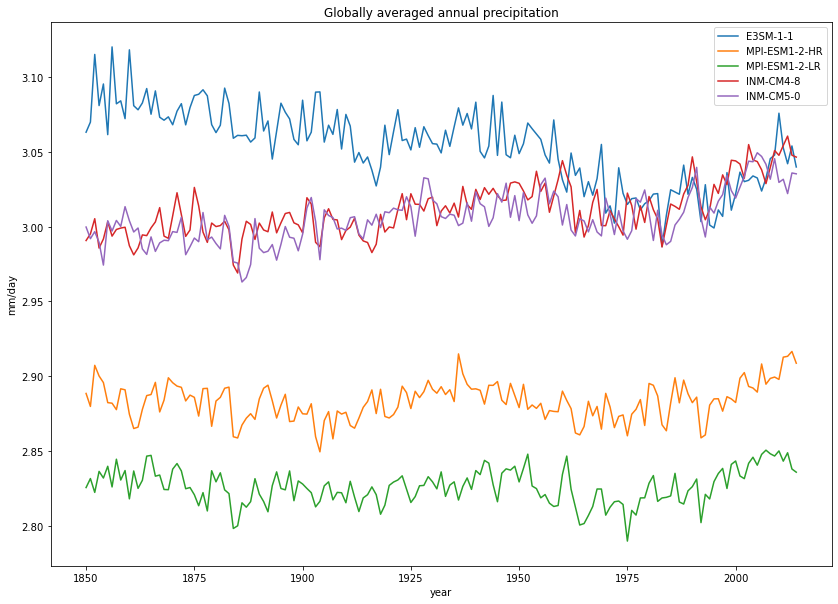

In [22]:
plt.figure(figsize=(14,10))
for infile in infiles[10:15]:
    cube = iris.load_cube(infile, 'precipitation_flux')
    years = np.arange(1850, 2015)
    model = infile.split('/')[8]
    plt.plot(years, cube.data[0:165], label=model)
plt.xlabel('year')
plt.legend()
plt.title('Globally averaged annual precipitation')
plt.ylabel('mm/day')
plt.savefig('/g/data/r87/dbi599/temp/pr_timeseries.png', bbox_inches='tight')

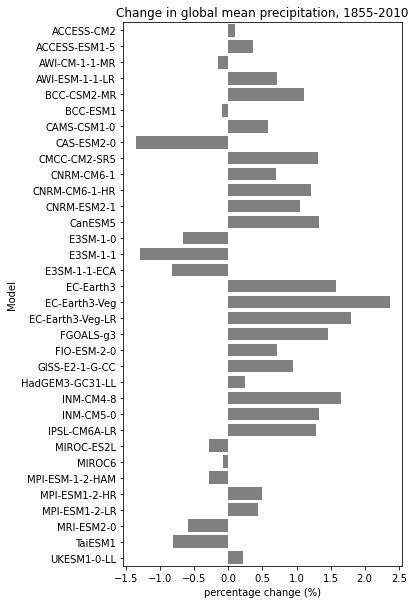

In [37]:
data_dict = {}
for infile in infiles:
    cube = iris.load_cube(infile, 'precipitation_flux')
    iris.coord_categorisation.add_year(cube, 'time')
    index = list(cube.coord('year').points).index(2014)
    data = cube.data[0:index+1]
    model = infile.split('/')[8]
    #start = data[-60:-50].mean()
    start = data[0:10].mean()
    end = data[-10:].mean()
    pct_change = ((end - start) / start) * 100
    data_dict[model] = pct_change

df = pd.DataFrame(data_dict.items(), columns=['Model', 'Change in P'])

plt.figure(figsize=(5,10))
chart = sns.barplot(y="Model", x="Change in P", data=df.sort_values('Model'), orient='h', color='0.5')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xlabel('percentage change (%)')
plt.title(f"Change in global mean precipitation, 1855-2010")
plt.savefig('/g/data/r87/dbi599/temp/pr_change_1855-2010.png', dpi=300, bbox_inches='tight')

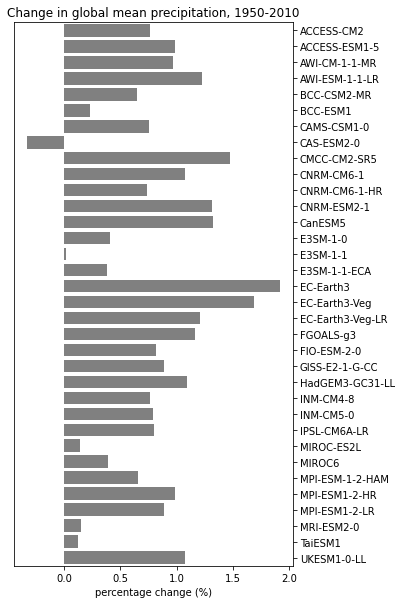

In [10]:
data_dict = {}
for infile in infiles:
    cube = iris.load_cube(infile, 'precipitation_flux')
    iris.coord_categorisation.add_year(cube, 'time')
    index = list(cube.coord('year').points).index(2014)
    data = cube.data[0:index+1]
    model = infile.split('/')[8]
    start = data[-60:-50].mean()
    end = data[-10:].mean()
    pct_change = ((end - start) / start) * 100
    data_dict[model] = pct_change

df = pd.DataFrame(data_dict.items(), columns=['Model', 'Change in P'])

plt.figure(figsize=(5,10))
chart = sns.barplot(y="Model", x="Change in P", data=df.sort_values('Model'), orient='h', color='0.5')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True,
                left=False, right=True, direction='out')
plt.xlabel('percentage change (%)')
plt.ylabel('')
plt.title(f"Change in global mean precipitation, 1950-2010")
plt.savefig('/g/data/r87/dbi599/temp/pr_change_1950-2010.png', dpi=300, bbox_inches='tight')